![Edem_Logo](https://n3m5z7t4.rocketcdn.me/wp-content/plugins/edem-shortcodes/public/img/logo-Edem.png)

# Serverless Data Processing

##### This notebook will be our first contact with **Apache Beam** where we will put into practice the concepts seen in the theory:

* PCollection & PTransform
* DoFn vs Other methods
* DoFn Life Cycle
* Streaming Concepts

<img src="https://miro.medium.com/max/1000/1*Iax0FeSxRIk22L_TbmVWXQ.jpeg" style="width: 200px; height:150px;">

## 00 | Setup

Before we start, we need to **authenticate** in Google Cloud Platform. It is important that when launching the cell we are logged into colab with the **same Google user** that we have used in the registration in GCP.

In [10]:
#@title Authenticate GCP

from google.colab import auth
auth.authenticate_user()

ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x7f09b88d3640>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/google/auth/compute_engine/credentials.py", line 111, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.8/dist-packages/google/auth/compute_engine/credentials.py", line 87, in _retrieve_info
    info = _metadata.get_service_account_info(
  File "/usr/local/lib/python3.8/dist-packages/google/auth/compute_engine/_metadata.py", line 234, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
  File "/usr/local/lib/python3.8/dist-packages/google/auth/compute_engine/_metadata.py", line 182, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google 

In [ ]:
#@title Install requirements
!pip install apache_beam[interactive]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.2/526.2 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.1/783.1 KB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.7/186.7 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 KB 19.3 MB/s eta 0:00:00
  Preparing m

In [5]:
#@title Import Common libraries
import logging
import apache_beam as beam
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib

## 01. Beam Basics

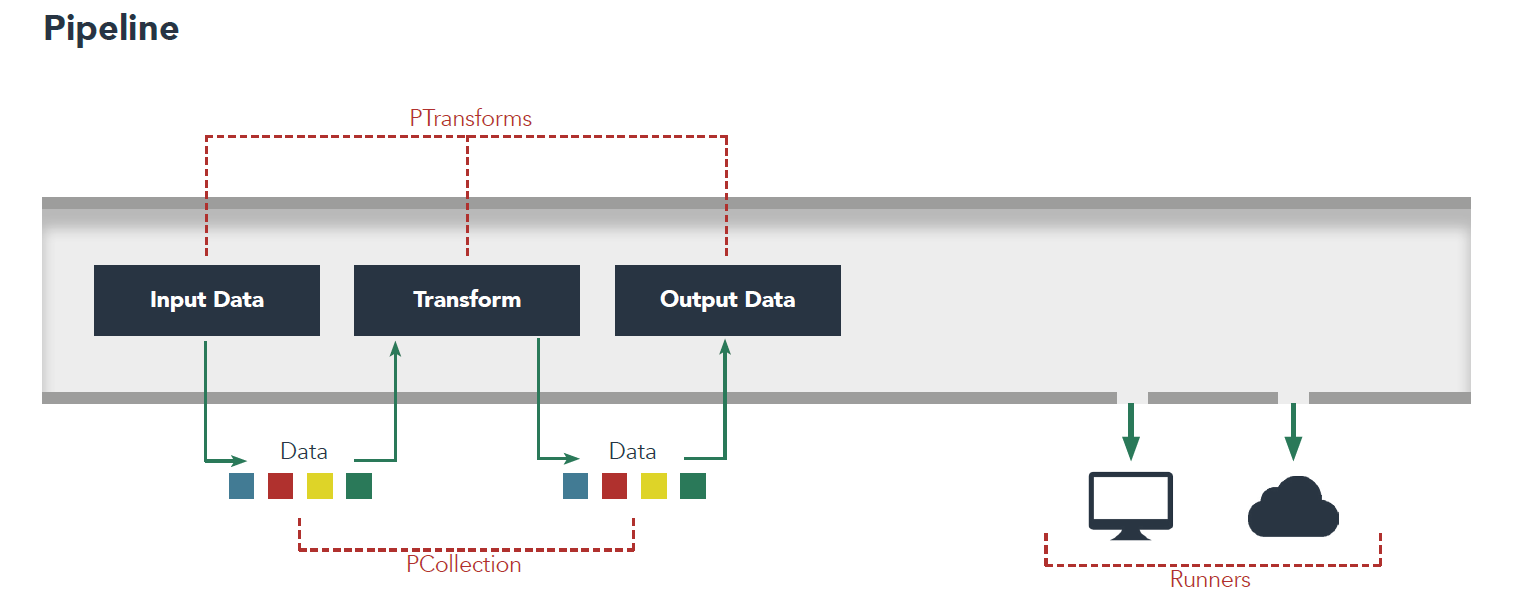

### Understanding basic concepts: PCollection, PTransform & Pipeline Object

Creating our first Beam Pipeline

In [ ]:
def cleanup(elem):
  return elem.replace(',', '').replace('.' ,'')

#Create the Pipeline Object
with beam.Pipeline(InteractiveRunner()) as p:
  #In order to get our first collection, we will create an I/O PTransform
  PColl_01 = p | "Read Input File" >> beam.io.ReadFromText('/content/input_text.txt')
  #Our second PCollection will be used to split the text into words.
  PColl_02 = PColl_01 | "Split words" >> beam.FlatMap(lambda x: x.split())
  PColl_02_01 = PColl_02 | "Replace commas" >> beam.Map(lambda x: cleanup(x))
  #Our third collection will pair the word with 1.
  PColl_03 = PColl_02_01 | "Pair words" >> beam.Map(lambda x: (x.replace(',', ''),1))
  #Finally, CombinePerKey allows us to get the number of times a word appears.
  PColl_04 = PColl_03 | "Count" >> beam.CombinePerKey(sum)
  #Print results
  PColl_04 | beam.Map(print)

('En', 1)
('un', 2)
('lugar', 1)
('de', 12)
('la', 1)
('Mancha', 1)
('cuyo', 1)
('nombre', 1)
('no', 2)
('quiero', 1)
('acordarme', 1)
('ha', 1)
('mucho', 1)
('tiempo', 1)
('que', 2)
('vivía', 1)
('hidalgo', 1)
('los', 5)
('lanza', 1)
('en', 1)
('astillero', 1)
('adarga', 1)
('antigua', 1)
('rocín', 1)
('flaco', 1)
('y', 2)
('galgo', 1)
('corredor', 1)
('Una', 1)
('olla', 1)
('algo', 1)
('más', 3)
('vaca', 1)
('carnero', 1)
('salpicón', 1)
('las', 3)
('noches', 1)
('duelos', 1)
('quebrantos', 1)
('sábados', 1)
('lantejas', 1)
('viernes', 1)
('algún', 1)
('palomino', 1)
('añadidura', 1)
('domingos', 1)
('consumían', 1)
('tres', 1)
('partes', 1)
('su', 2)
('hacienda', 1)
('El', 1)
('resto', 1)
('della', 1)
('concluían', 1)
('sayo', 1)
('velarte', 1)
('calzas', 1)
('velludo', 1)
('para', 1)
('fiestas', 1)
('con', 2)
('sus', 1)
('pantuflos', 1)
('lo', 2)
('mismo', 1)
('días', 1)
('entre', 1)
('semana', 1)
('se', 1)
('honraba', 1)
('vellorí', 1)
('fino', 1)


In [ ]:
ib.show(PColl_04)

### Understanding basic concepts: DoFn vs Map

The goal of this second exercise is to see how DoFn methods are still full versions of the methods we have used before

In [ ]:
#Method
def mult(element, num):
  return element * num

#DoFn
class mult_new(beam.DoFn):
  def process(self, element, num):
    yield element * num

#Pipeline
with beam.Pipeline(InteractiveRunner()) as p:
  input_data = (
      p 
        | "Create a PCollection" >> beam.Create([1,2,3,4,5])
        #| "Map" >> beam.Map(mult, num=5)
        | "DoFn" >> beam.ParDo(mult_new(),5)
  )

In [ ]:
#Show PCollection
ib.show(input_data)

### Exercise: Removes all punctuation symbols from the previous exercise.

In [ ]:
#YOUR_CODE

### Understanding DoFN Life Cycle

The third exercise will show the DoFn LifeCycle and how it will always be computed even if we vary the order of the methods within the class.

In [ ]:
from datetime import datetime

class DoFnLifeCycle(beam.DoFn):

  def now(self):
    self._now = datetime.now()
    return self._now

  def __init__(self):
    print("Constructor started at: %s" % self.now())

  def setup(self):
    print("worker started at: %s" % self.now())

  def start_bundle(self):
    print("bundle started at: %s" % self.now())

  def process(self, element):
    words = element.split()
    for word in words:
      print("Processing element: %s" % word)
      yield word.upper()

  def finish_bundle(self):
    print("bundle finished at: %s" % self.now())

  def teardown(self):
    print("worker finished at: %s" % self.now())

with beam.Pipeline(InteractiveRunner()) as p:
  input_data = (
      p 
        | "Reading the input file" >> beam.io.ReadFromText('/content/input_text.txt')
        | "DoFn Life Cycle" >> beam.ParDo(DoFnLifeCycle())
  )

Constructor started at: 2023-01-27 18:11:30.624754
worker started at: 2023-01-27 18:11:31.831569
bundle started at: 2023-01-27 18:11:31.836195
Processing element: En
Processing element: un
Processing element: lugar
Processing element: de
Processing element: la
Processing element: Mancha,
Processing element: de
Processing element: cuyo
Processing element: nombre
Processing element: no
Processing element: quiero
Processing element: acordarme,
Processing element: no
Processing element: ha
Processing element: mucho
Processing element: tiempo
Processing element: que
Processing element: vivía
Processing element: un
Processing element: hidalgo
Processing element: de
Processing element: los
Processing element: de
Processing element: lanza
Processing element: en
Processing element: astillero,
Processing element: adarga
Processing element: antigua,
Processing element: rocín
Processing element: flaco
Processing element: y
Processing element: galgo
Processing element: corredor.
Processing element:

### Understanding the different ways to set our transformations

The goal at this point is to check how we can perform the same operations and how we can better organize our code.

In [ ]:
#Method
def mult(element):
  return element * 2

#DoFn
class mult_new(beam.DoFn):
  def process(self, element, num):
    yield element * num

#PTransform
class mult_transform(beam.PTransform):
  def expand(self, PColl):
    PColl_test = PColl | "Pair" >> beam.Map(lambda x: (x,1))
    yield PColl_test

#Pipeline
with beam.Pipeline(InteractiveRunner()) as p:
  input_data = (
      p 
        | "Create a PCollection" >> beam.Create([1,2,3,4,5])
        | "Map" >> beam.Map(mult)
        | "DoFn" >> beam.ParDo(mult_new(),5)
  )

  output_data = input_data | mult_transform()

In [ ]:
ib.show(output_data)

### GCP: Streaming Pipeline Demo

In [3]:
# from apache_beam.typehints.batch import N
#Uninstall apache_beam[interactive]
# !pip uninstall apache_beam[interactive]
#Install apache_beam[gcp]
!pip install apache_beam[gcp] 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.2/526.2 KB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 KB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.

In [4]:
#Create a PubSub Topic
!gcloud pubsub topics create input_topic --project first-strength-375917

ERROR: (gcloud.pubsub.topics.create) You do not currently have an active account selected.
Please run:

  $ gcloud auth login

to obtain new credentials.

If you have already logged in with a different account:

    $ gcloud config set account ACCOUNT

to select an already authenticated account to use.


In [5]:
# output topic
!gcloud pubsub topics create output_topic --project first-strength-375917

ERROR: (gcloud.pubsub.topics.create) You do not currently have an active account selected.
Please run:

  $ gcloud auth login

to obtain new credentials.

If you have already logged in with a different account:

    $ gcloud config set account ACCOUNT

to select an already authenticated account to use.


In [19]:
# output subscription
!gcloud pubsub subscriptions create output_subs --topic output_topic --project first-strength-375917

Created subscription [projects/first-strength-375917/subscriptions/output_subs].


In [15]:
#Create a PubSub Subscription
!gcloud pubsub subscriptions create input_subs --topic input_topic --project first-strength-375917

Created subscription [projects/first-strength-375917/subscriptions/input_subs].


In [8]:
#Create a BigQuery Dataset
!bq mk --location EU first-strength-375917:input_data

Dataset 'first-strength-375917:input_data' successfully created.


In [8]:
#Input vars
project_id = "first-strength-375917"
dataset = "input_data"
table = "input_table"
subscription_name = "input_subs"
output_topic = "output_topic"

In [12]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp import bigquery_tools
from apache_beam.transforms.combiners import MeanCombineFn
from apache_beam.transforms.combiners import CountCombineFn
from apache_beam.transforms.core import CombineGlobally
import apache_beam.transforms.window as window
import json
import datetime

#Parse PubSub Messages
def parsePubSubMessages(message):
  msg = message.data.decode('utf-8')
  row = json.loads(msg)
  return row

class extract_amount(beam.DoFn):
    def process(self, element):
        temp = element['Amount']
        yield temp

class add_processing_time(beam.DoFn):
    def process(self, element):
        window_start = str(datetime.datetime.now())
        output_data = {'aggrAmount': element, 'processingTime': window_start}
        output_json = json.dumps(output_data)
        yield output_json.encode('utf-8')

#BigQuery Schema
input_schema = {
    "fields": [
    {
      "mode": "NULLABLE",
      "name": "Amount",
      "type": "STRING"
    },
    {
      "mode": "NULLABLE",
      "name": "Timestamp",
      "type": "STRING"
    }]
}

schema = bigquery_tools.parse_table_schema_from_json(json.dumps(input_schema))

def print_data(elem):
  print(elem)
  return elem

#Pipeline Options
options = PipelineOptions(streaming=True)
with beam.Pipeline(options=options) as p:
  data = (p 
    | "Read messages from PubSub" >> beam.io.ReadFromPubSub(subscription=f"projects/{project_id}/subscriptions/{subscription_name}", with_attributes=True)
    | "Parse JSON messages" >> beam.Map(parsePubSubMessages)
    | "Print" >> beam.Map(print_data)
  )
  (data
    | "Write BQ" >> beam.io.WriteToBigQuery(
        table = f"{project_id}:{dataset}.{table}",
        schema = schema,
        create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
        write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND
    )
  )

  (data 
    | "Get value" >> beam.ParDo(extract_amount())
    | "WindowByMinute" >> beam.WindowInto(window.FixedWindows(30))
    | "TotalByWindow" >> beam.CombineGlobally(MeanCombineFn()).without_defaults()
    | "Add Window ProcessingTime" >> beam.ParDo(add_processing_time())
    | "Print Output" >> beam.Map(print_data)
    | "WriteToPubSub" >> beam.io.WriteToPubSub(topic=f"projects/{project_id}/topics/{output_topic}", with_attributes=False)
  )

{'Amount': 13, 'Timestamp': '2023-01-30 22:36:21.809891'}
{'Amount': 34, 'Timestamp': '2023-01-30 22:36:27.926026'}
{'Amount': 3, 'Timestamp': '2023-01-30 22:36:33.895029'}
{'Amount': 46, 'Timestamp': '2023-01-30 22:36:39.855454'}
b'{"aggrAmount": 34.0, "processingTime": "2023-01-30 21:36:41.624931"}'
{'Amount': 50, 'Timestamp': '2023-01-30 22:36:45.954322'}
{'Amount': 2, 'Timestamp': '2023-01-30 22:36:52.016280'}
{'Amount': 46, 'Timestamp': '2023-01-30 22:36:58.058496'}
{'Amount': 38, 'Timestamp': '2023-01-30 22:37:04.056976'}
b'{"aggrAmount": 24.0, "processingTime": "2023-01-30 21:37:05.778409"}'
{'Amount': 11, 'Timestamp': '2023-01-30 22:37:10.176101'}
{'Amount': 14, 'Timestamp': '2023-01-30 22:37:16.194999'}
{'Amount': 41, 'Timestamp': '2023-01-30 22:37:22.254193'}
{'Amount': 48, 'Timestamp': '2023-01-30 22:37:28.298517'}
{'Amount': 20, 'Timestamp': '2023-01-30 22:37:34.278539'}
{'Amount': 27, 'Timestamp': '2023-01-30 22:37:40.428955'}
b'{"aggrAmount": 33.333333333333336, "processi

KeyboardInterrupt: ignored